In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import datetime
%matplotlib inline

In [ ]:
def max_stock(data):
    L = []
    for i in set(data["stock"]):
        counter = list(data["stock"].values).count(i)
        L.append(counter)                                        ###L为各股票出现的次数，即交易天数
    stock_id = list(set(data["stock"]))
    stock_m = stock_id[L.index(max(L))]                           ###选出交易天数最全的一只股票
    return stock_m

In [ ]:
def best_perf(data, stock_eg, T, N1, N2, D):                                 ###data为原始数据，T为所要比较的涨跌幅的日期，N1，N2为T之前和T之后的时间跨度，K为最大成交总额及涨跌幅对比数

    data['stock'] = data['stock'].astype(str)                       ###更改stock的数据类型为字符型

    start = int(stock_eg[stock_eg['date'] ==  T].index.values-N1-1)-stock_eg.index[0]                  ###寻找T前N+1天的索引位置
    middle = int(stock_eg[stock_eg['date'] == T].index.values)-1-stock_eg.index[0]             ###寻找T日前一日的索引位置
    end = middle+N2                                                 ###统计涨跌幅最后一日的索引位置
    slc = stock_eg.iloc[[start, middle, middle+1, end],:]           ###选出所需计算的股票信息
    
    init = data[data['date'] == slc['date'].values[0]]
    middle = data[data['date'] == slc['date'].values[1]]
    determ = data[data['date'] == slc['date'].values[2]]
    fina = data[data['date'] == slc['date'].values[3]]
    secl_sum = init.append(middle).sort_index()
    secl_sum = secl_sum.append(determ).sort_index()
    secl_sum = secl_sum.append(fina).sort_index()                   ####将所有在T,T-N1-1,T-1，T-1+N2时有数据的股票信息合成一张表
    
    stock_intersect = list(set(init['stock']).intersection(set(middle['stock'])))
    stock_intersect = list(set(stock_intersect).intersection(set(determ['stock'])))
    stock_intersect = list(set(stock_intersect).intersection(set(fina['stock'])))        ###选出在上述四个时段都有数据的股票
    
    stock_f = pd.DataFrame(columns = ['date', 'stock', 'close', 'value', 'turnover_sum', 'turnover_N1', 'turnover_N2', 'change_N1','change_N2'])  ###建立一个空的dataframe
    
    for k in stock_intersect:
        starter = secl_sum[secl_sum['stock'] == k]
        starter = starter[['date', 'stock', 'close', 'value', 'turnover_sum']]
        turn_o = starter['turnover_sum']
        close = starter['close']
        differ_t = (turn_o.values[1]-turn_o.values[0])/turn_o.values[0]                 ###计算T前N1天的成交金额变化率
        differ_c0 = (close.values[1]-close.values[0])/close.values[0]              ###计算T前N1天的涨跌幅
        differ_t2 = (turn_o.values[3]-turn_o.values[1])/turn_o.values[1]                 ###计算T后N2天的成交金额变化率
        differ_c = (close.values[3]-close.values[1])/close.values[1]              ###计算T后N2天的涨跌幅
        stock_a = starter[starter['date'] == T]
        stock_a.insert(5,'turnover_N1',[differ_t/N1])
        stock_a.insert(6,'turnover_N2',[differ_t2/N2])
        stock_a.insert(7,'change_N1',[differ_c0/N1])                    ###插入N1天的平均日涨跌幅
        stock_a.insert(8,'change_N2',[differ_c/N2])                    ###插入N2天的平均日涨跌幅
        stock_f = stock_f.append(stock_a)
    stock_f = stock_f.sort_index()
    stock_f = stock_f[['date', 'stock', 'close', 'value', 'turnover_N1', 'turnover_N2', 'change_N1', 'change_N2']]
    
    stock_Tmax = stock_f.sort_values(by = ['turnover_N1'], ascending = False).head(D)
    stock_Vmin = stock_f.sort_values(by = ['value'], ascending = True).head(K)           ###取出前N1天市值最小的K个股票
    stock_bestinf = stock_Tmax[['stock', 'date', 'close', 'value', 'change_N1', 'change_N2', 'turnover_N1', 'turnover_N2']]
    
    return stock_bestinf

In [ ]:
data = pd.read_csv('D:/Documents/Go Abroad/实习/成交金额/Python数据//2017_4/2017.csv',encoding='gbk',engine='python')

In [ ]:
#stock_m = max_stock(data)
stock_m = 1
stock_eg = data[data['stock'] == stock_m]

In [ ]:
T = '2017-01-09'
N1 = 3
N2 = 5
D = 100
stock_f = best_perf(data, stock_eg, T, N1, N2, D)

In [ ]:
stock_f = stock_f.reset_index(drop = True)

In [ ]:
stock_min = stock_f.sort_values(by = 'value', ascending = True)
stock_f2 = stock_min.head(100)
stock_f2 = stock_f2.reset_index(drop = True)

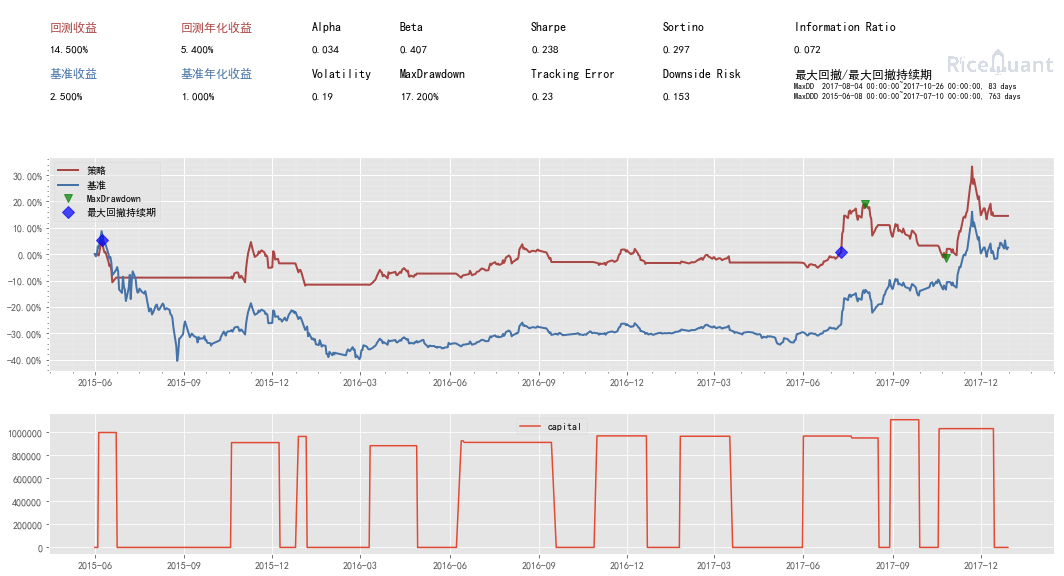

{'sys_analyser': {'summary': {'strategy_name': 'strategy',
   'start_date': '2015-06-01',
   'end_date': '2017-12-29',
   'strategy_file': 'strategy.py',
   'run_type': 'BACKTEST',
   'benchmark': '000001.XSHE',
   'STOCK': 1000000.0,
   'alpha': 0.034,
   'beta': 0.407,
   'sharpe': 0.238,
   'information_ratio': 0.072,
   'downside_risk': 0.153,
   'tracking_error': 0.23,
   'sortino': 0.297,
   'volatility': 0.19,
   'max_drawdown': 0.172,
   'total_value': 1145330.792,
   'cash': 1145330.792,
   'total_returns': 0.145,
   'annualized_returns': 0.054,
   'unit_net_value': 1.145,
   'units': 1000000.0,
   'benchmark_total_returns': 0.025,
   'benchmark_annualized_returns': 0.01},
  'trades':                      commission     exec_id  last_price  last_quantity  \
  datetime                                                                 
  2015-06-04 15:00:00   798.85600  1528264620       16.37        61000.0   
  2015-06-23 15:00:00   729.56000  1528264621       14.95        61000.

In [2]:
import rqalpha
import os
from rqalpha.api import *
import talib
import pandas as pd
def init(context):
    context.s1 = "000001.XSHE"
    context.SHORTPERIOD = 10
    context.LONGPERIOD = 30
def handle_bar(context, bar_dict):
    prices = history_bars(context.s1, context.LONGPERIOD+1, '1d', 'close')
    short_avg = talib.SMA(prices, context.SHORTPERIOD)
    long_avg = talib.SMA(prices, context.LONGPERIOD)
    # 计算现在portfolio中股票的仓位
    cur_position = context.portfolio.positions[context.s1].quantity
    avg_price = context.portfolio.positions[context.s1].avg_price
    capital = cur_position*avg_price
    # 计算现在portfolio中的现金可以购买多少股票
    shares = context.portfolio.cash/bar_dict[context.s1].close
    #图形显示当前占用资金
    plot('capital', capital)
    # 如果短均线从上往下跌破长均线，而上一个bar的短线平均值高于长线平均值
    if short_avg[-1] - long_avg[-1] < 0 and short_avg[-2] - long_avg[-2] > 0 and cur_position > 0:
        # 进行清仓
        order_target_value(context.s1, 0)
    # 如果短均线从下往上突破长均线，为入场信号
    if short_avg[-1] - long_avg[-1] > 0 and short_avg[-2] - long_avg[-2] < 0:
        # 满仓入股
        order_shares(context.s1, shares)
config = {
  "base": {
    "start_date": "2015-06-01",
    "end_date": "2017-12-30",
    "accounts": {'stock':1000000},
    "benchmark": "000001.XSHE",
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "error",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}
# 您可以指定您要传递的参数
rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)